# PCA - Project

### Data

    Background:

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


#### Data Set Information from Original Authors:

We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('digits.csv')

In [3]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [4]:
df.shape

(1797, 65)

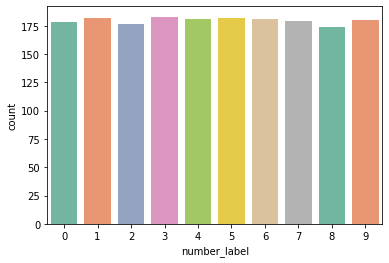

In [5]:
sns.countplot(x=df['number_label'],palette='Set2');

In [6]:
pixel = df.drop('number_label',axis=1)

In [7]:
pixel.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Displaying an Image

In [8]:
pixel.iloc[0]

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [9]:
pixel.iloc[0].to_numpy().shape

(64,)

In [10]:
no = pixel.iloc[0].to_numpy().reshape(8,8)

In [11]:
no

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

#### Note: This is not an image  

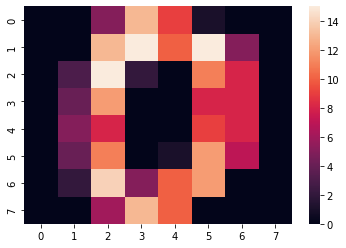

In [12]:
sns.heatmap(no);

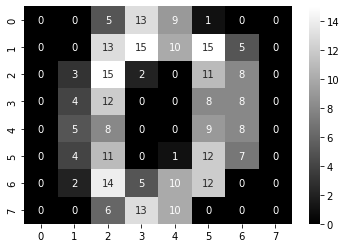

In [13]:
sns.heatmap(no,cmap='gray',annot=True);

In [14]:
no9 = pixel.iloc[1792].to_numpy().reshape(8,8)

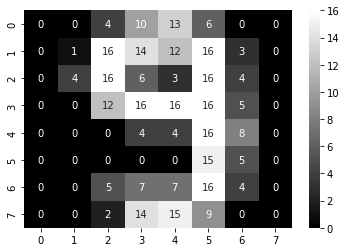

In [15]:
sns.heatmap(no9,annot=True,cmap='gray');

## Scaling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X = scaler.fit_transform(pixel)

<AxesSubplot:>

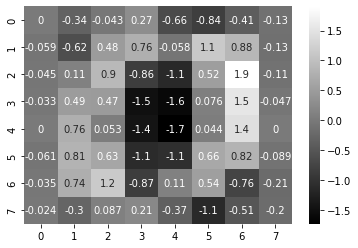

In [19]:
sns.heatmap( scaled_X[:1,:].reshape(8,8),annot=True,cmap='gray')

## PCA


In [20]:
from sklearn.decomposition import PCA

In [21]:
pca_model = PCA(n_components=2)

In [22]:
pca_pixels = pca_model.fit_transform(scaled_X)

In [23]:
pca_model.explained_variance_

array([7.34477606, 5.83549053])

In [24]:
np.sum(pca_model.explained_variance_)

13.180266591052462

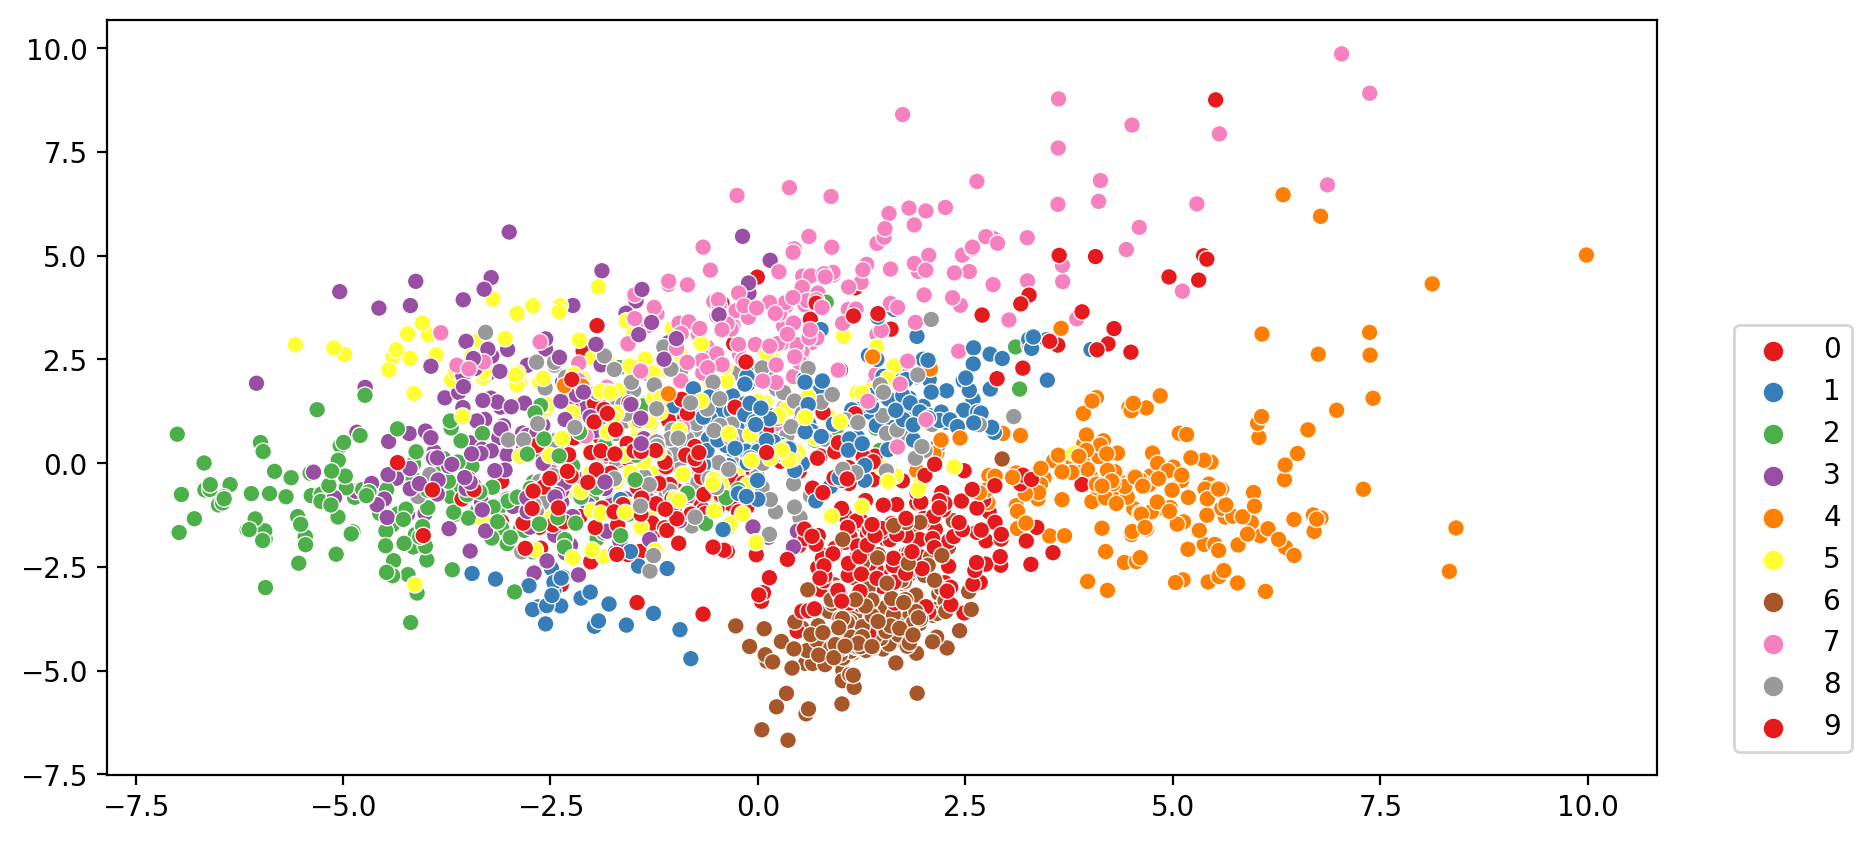

In [25]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(x=pca_pixels[:,0],y=pca_pixels[:,1],hue = df['number_label'],palette='Set1')
plt.legend(loc=(1.05,0.03))

In [26]:
pca_mo = PCA(n_components=3)

In [27]:
pex = pca_mo.fit_transform(scaled_X)

In [28]:
pca_mo.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415])

In [29]:
np.sum(pca_mo.explained_variance_ratio_)

0.30039385390379425

In [30]:
### %matplotlib notebook

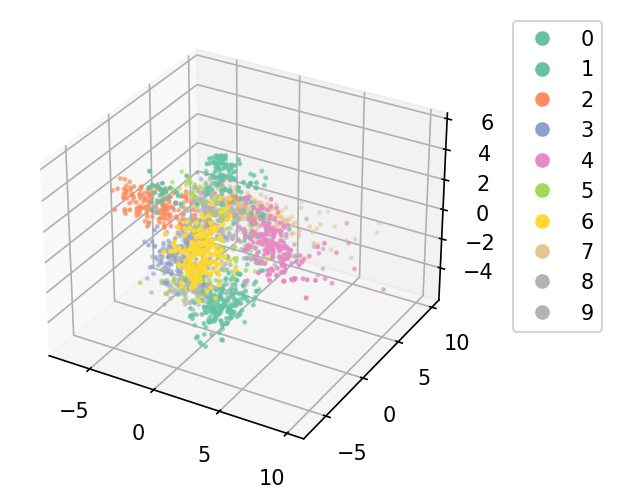

In [31]:
plt.figure(dpi=150)
ax = plt.axes(projection= '3d' ) 
sc = ax.scatter3D(pex[:,0],pex[:,1],pex[:,2],c=df['number_label'],cmap='Set2',s=2)

plt.legend(*sc.legend_elements(),loc=(1.10,0.3))
#plt.colorbar(sc)
plt.show()

-----

In [32]:
variance = []

for n in range(1,65):
    model = PCA(n_components=n)
    model.fit(scaled_X)
    
    variance.append(np.sum(model.explained_variance_ratio_))

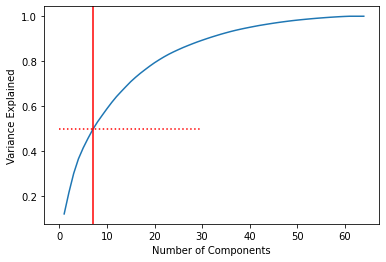

In [33]:
plt.plot(range(1,65),variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.hlines(y=0.50,xmax=30,xmin=0,color='red',linestyles=':')
plt.axvline(x=7,color='red',ymax=1,ymin=0);

### Classification by Using Support Vector Machine 

In [34]:
ml = PCA(n_components=7)  
px =ml.fit_transform(scaled_X)
np.sum(ml.explained_variance_ratio_)

0.49551543173193496

In [35]:
X = px

In [36]:
y = df['number_label']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=101)

In [39]:
svc = SVC()

In [40]:
svc.fit(X_train,y_train)

SVC()

In [41]:
y_prd = svc.predict(X_test)

In [42]:
y_prd[:10]

array([7, 4, 7, 9, 1, 7, 5, 7, 1, 0], dtype=int64)

In [43]:
y_test[:10]

653     7
100     4
1209    7
325     9
716     1
1710    7
1672    5
1145    7
926     1
0       0
Name: number_label, dtype: int64

### Evaluation Of Model 

In [44]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [45]:
print(classification_report(y_prd,y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.95      0.91      0.93        44
           2       0.94      0.97      0.95        30
           3       0.74      0.92      0.82        25
           4       0.95      0.93      0.94        45
           5       0.95      0.95      0.95        41
           6       0.93      0.96      0.95        27
           7       1.00      0.98      0.99        41
           8       0.83      0.81      0.82        37
           9       0.94      0.84      0.89        37

    accuracy                           0.92       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.93      0.92      0.92       360



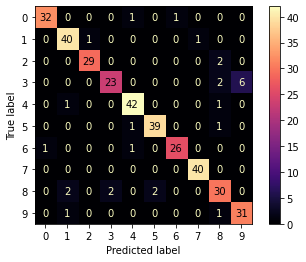

In [46]:
ConfusionMatrixDisplay.from_estimator(svc,X_test,y_test,cmap='magma');

In [47]:
def predict():
    import random
    n =  random.randint(0,1797+1)
    sns.heatmap(pixel.iloc[n].to_numpy().reshape(8,8),cmap='gray')
    print('Row index of Data in df : ',n,'\n')
    print('Actual Value : ',y.iloc[n],'\n')
    print('Pridicted Value : ',svc.predict(np.array([X[n]])))
    

Row index of Data in df :  1285 

Actual Value :  9 

Pridicted Value :  [9]


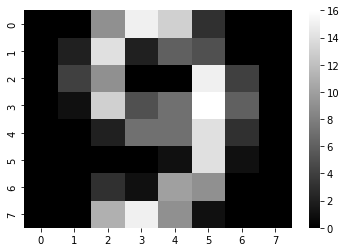

In [48]:
predict()

----------------